<a href="https://colab.research.google.com/github/ben-fajack/Final-Sales-Predictions/blob/main/SalesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will continue to work on your sales prediction project. The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

You should load a fresh version of the original data set here using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing

- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
- Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.
- Perform a train test split
- Create a preprocessing object to prepare the dataset for Machine Learning
- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Load data set from URL
path = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# dropping unecessary column
df = df.drop('Outlet_Establishment_Year', axis=1)

In [5]:
# dropping unecessary column
df = df.drop('Outlet_Identifier', axis=1)

In [6]:
# dropping unecessary column
df = df.drop('Item_Identifier', axis=1)

In [7]:
# dropping unecessary column
df = df.drop('Item_Weight', axis=1)

In [8]:
# Count the duplicates
df.duplicated().sum()

0

In [9]:
# Check for how many unique values are in each column
df.nunique()

Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
# replacing inconsistencies
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular'})

In [12]:
#replacing inconsistencies
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat'})

In [13]:
#inspecting
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [15]:
# Target column
y = df['Item_Outlet_Sales']
# Features
X = df.drop(columns = 'Item_Outlet_Sales')

In [16]:
# Import TTS
from sklearn.model_selection import train_test_split

In [17]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42 )

In [18]:
X_train.head(5)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,0.029565,Household,256.4646,Medium,Tier 3,Supermarket Type2
7510,Regular,0.000000,Snack Foods,179.7660,Medium,Tier 3,Supermarket Type2
5828,Regular,0.158716,Meat,157.2946,Medium,Tier 1,Supermarket Type1
5327,Low Fat,0.014628,Baking Goods,82.3250,Small,Tier 2,Supermarket Type1
4810,Low Fat,0.016645,Frozen Foods,120.9098,NaN,Tier 2,Supermarket Type1


In [19]:
# Defining lists of types of features
num_cols = X_train.select_dtypes("number").columns
num_cols


Index(['Item_Visibility', 'Item_MRP'], dtype='object')

In [20]:
# Null values
X_train[num_cols].isna().sum()

Item_Visibility    0
Item_MRP           0
dtype: int64

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [22]:
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [24]:
num_pipe = make_pipeline(impute_median, scaler)
num_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [25]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Visibility', 'Item_MRP'], dtype='object'))

In [26]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
# Defining lists of ordinal features
ord_cols = ['Outlet_Size']


In [29]:
# New Imports
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [30]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
# Specifying the order of categories in outlet size
impute_mf_ord = SimpleImputer(strategy='most_frequent')
## Making the OrdinalEncoder
# Specifying order of categories for our  outlet size
outlet_order = ['Small', 'Medium', 'High']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [outlet_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()

In [32]:
# Making an ord_pipe
ord_pipe = make_pipeline(impute_mf_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [33]:
# Defining list of nominal features
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns


In [34]:
# Instantiate the individual preprocessors
impute_mf = SimpleImputer(strategy='most_frequent')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [35]:
# Instantiate the pipeline
ohe_pipe = make_pipeline(impute_mf, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [36]:
X_train[ohe_cols].isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [37]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple


('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

In [38]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))

In [39]:
# Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False,)


In [40]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [41]:
# Fit on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [42]:
# Fit on test data
preprocessor.fit(X_test)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [43]:
# Transform the training data
X_train_tf = preprocessor.transform(X_train)
# Transform test data
X_test_tf = preprocessor.transform(X_test)

In [44]:
# View the processed training data
X_train_tf.head()

,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,-0.697371,1.938214,0.276339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,-1.255494,0.683017,0.276339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,1.740683,0.315265,0.276339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-0.979345,-0.911637,-1.373180,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,-0.941273,-0.280184,0.276339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [45]:
X_train_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Visibility                  6392 non-null   float64
 1   Item_MRP                         6392 non-null   float64
 2   Outlet_Size                      6392 non-null   float64
 3   Item_Fat_Content_Low Fat         6392 non-null   float64
 4   Item_Fat_Content_Regular         6392 non-null   float64
 5   Item_Type_Baking Goods           6392 non-null   float64
 6   Item_Type_Breads                 6392 non-null   float64
 7   Item_Type_Breakfast              6392 non-null   float64
 8   Item_Type_Canned                 6392 non-null   float64
 9   Item_Type_Dairy                  6392 non-null   float64
 10  Item_Type_Frozen Foods           6392 non-null   float64
 11  Item_Type_Fruits and Vegetables  6392 non-null   float64
 12  Item_Type_Hard Dr

In [46]:
X_train_tf.isna().sum()

Item_Visibility                    0
Item_MRP                           0
Outlet_Size                        0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Location_Type_Tier 1        0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Type_Grocery Store          0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
O

In [47]:
X_train_tf.describe()

,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,...,6392.00000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,-0.009438,0.064643,-0.007269,0.645964,0.354036,0.074781,0.027378,0.013141,0.075250,0.079318,...,0.14174,0.051783,0.019086,0.274562,0.329474,0.395964,0.125000,0.651752,0.110138,0.113110
std,0.965223,1.024948,0.986973,0.478258,0.478258,0.263058,0.163195,0.113889,0.263815,0.270255,...,0.34881,0.221607,0.136839,0.446328,0.470059,0.489095,0.330745,0.476452,0.313086,0.316752
min,-1.255494,-1.746841,-1.373180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.745289,-0.718179,-1.373180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.233227,0.099498,0.276339,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.530661,0.799772,0.276339,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,4.943748,2.108803,1.925858,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:

def regression_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):

  """Helper Function
  This custom function accept true targets and predictions with custom label
  Calculate and print  MAE, MSE , RMSE and R2 scores by saving it in a dictionary"""

  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics



In [49]:

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False, model_name =''):

  """This custom function accepts the model, X_train, y_train, X_test, and y_test
  Obtains the predictions from the model for both training and test data
  Inputs the true and predicted values into the helper function to obtain all the metrics for both the training and test data.
  Prints the results (optional with default as True
  Save the results as a dataframe (optional with default as False)"""

  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label= model_name + ' ' + 'Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label=model_name + ' ' + 'Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [50]:
## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg


LinearRegression()

In [52]:
X_train_tf.head()

,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,-0.697371,1.938214,0.276339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,-1.255494,0.683017,0.276339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,1.740683,0.315265,0.276339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-0.979345,-0.911637,-1.373180,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,-0.941273,-0.280184,0.276339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [53]:
# Fit the model on the training data
lin_reg.fit(X_train_tf, y_train)

LinearRegression()

In [54]:
# Fit the model on the test data
lin_reg.fit(X_test_tf, y_test)

LinearRegression()

In [55]:
# Model Pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
lin_reg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalE...
                                                  ['Outlet_Size']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [56]:
# View the coefficents determined during the fit step
lin_reg.coef_.round(2)

array([ 6.32000e+00,  9.28050e+02, -3.76700e+01,  9.35000e+00,
       -9.35000e+00,  2.11400e+01,  1.01190e+02, -9.01200e+01,
        4.64500e+01,  1.70620e+02, -6.28600e+01,  5.90000e-01,
       -9.50000e+00, -8.89800e+01, -1.39200e+02,  5.33800e+01,
        1.83500e+01, -6.58200e+01,  4.66000e+01,  4.60000e+01,
       -4.78400e+01, -1.11300e+01,  3.55900e+01, -2.44700e+01,
       -1.72074e+03,  1.99600e+02, -1.31560e+02,  1.65270e+03])

In [57]:
# Get a list of the feature names after processing
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [58]:
# Create a Pandas Series with feature name and coefficient
coeffs = pd.Series(lin_reg.coef_.round(2), index = feature_names)
coeffs

Item_Visibility                       6.32
Item_MRP                            928.05
Outlet_Size                         -37.67
Item_Fat_Content_Low Fat              9.35
Item_Fat_Content_Regular             -9.35
Item_Type_Baking Goods               21.14
Item_Type_Breads                    101.19
Item_Type_Breakfast                 -90.12
Item_Type_Canned                     46.45
Item_Type_Dairy                     170.62
Item_Type_Frozen Foods              -62.86
Item_Type_Fruits and Vegetables       0.59
Item_Type_Hard Drinks                -9.50
Item_Type_Health and Hygiene        -88.98
Item_Type_Household                -139.20
Item_Type_Meat                       53.38
Item_Type_Others                     18.35
Item_Type_Seafood                   -65.82
Item_Type_Snack Foods                46.60
Item_Type_Soft Drinks                46.00
Item_Type_Starchy Foods             -47.84
Outlet_Location_Type_Tier 1         -11.13
Outlet_Location_Type_Tier 2          35.59
Outlet_Loca

In [59]:
# View the first row of features in the test set
X_test_tf.head(1)

,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,-0.759016,-0.959011,1.925858,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [60]:
# Get predictions for the training data
y_predictions_train = lin_reg.predict(X_train_tf)
# Get predictions for the testing data
y_predictions_test = lin_reg.predict(X_test_tf)

In [61]:
# Saving a copy of X_test_tf and adding the true and predicted sales and the error
prediction_df = X_test_tf.copy()
prediction_df['True Sales'] = y_test
prediction_df['Predicted Sales'] = y_predictions_test.round(1)
prediction_df['Error'] = (y_predictions_test - y_test).round(1)
prediction_df.head(10)

,Item_Visibility,Item_MRP,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,True Sales,Predicted Sales,Error
7503,-0.759016,-0.959011,1.925858,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1743.0644,1187.9,-555.2
2957,0.087383,-1.559972,-1.373180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,356.8688,747.0,390.1
7031,-0.475598,-1.570826,0.276339,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,377.5086,788.0,410.5
1084,-0.410398,0.583833,0.276339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5778.4782,4227.3,-1551.1
856,-1.020358,0.973420,-1.373180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2356.9320,3261.5,904.6
4304,-0.463550,-1.727203,0.276339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,865.5400,661.2,-204.4
2132,1.138791,1.161883,0.276339,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4613.9940,4792.7,178.7
1385,-0.999675,0.065216,0.276339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2410.8618,1958.6,-452.2
5239,-0.805610,-0.571104,0.276339,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1948.1308,1362.6,-585.6
6516,-0.950123,0.885649,0.276339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1937.4780,2553.3,615.8


- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

Consistently low R2 numbers would indicate an underfit model.

### **Random Forests**

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [64]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalE...
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [65]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 298.707
- MSE = 186,032.528
- RMSE = 431.315
- R^2 = 0.937

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 773.113
- MSE = 1,233,337.167
- RMSE = 1,110.557
- R^2 = 0.553


In [66]:
# Use custom function to evaluate default model
evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 849.260
- MSE = 1,327,608.024
- RMSE = 1,152.219
- R^2 = 0.551

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 795.599
- MSE = 1,181,546.101
- RMSE = 1,086.989
- R^2 = 0.572


- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- Compare this model's performance to the linear regression model: which model has the best test scores?

The model appears to be wildly overfit but that doesn't appear to be the only problem and I am not sure where to turn for answers at the moment.

the random forests model seems to be performing much better than the linear regression in basically every metric but it too is far from perfect as it appears to be experiencing some variance.

In [67]:
from sklearn.tree import DecisionTreeRegressor


In [68]:
# Instantiate a default model with random state for reproducibility
model = DecisionTreeRegressor(random_state = 42)
# Fit the default model on the training data
model.fit(X_train_tf, y_train)
# Use custom function to predict and evaluate
evaluate_regression(model, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 1,039.812
- MSE = 2,237,675.419
- RMSE = 1,495.886
- R^2 = 0.189


In [69]:
# View parameters that could be tuned
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [70]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4]}

In [71]:
from sklearn.model_selection import GridSearchCV


In [72]:
#Instantiate GridSearchCV
grid_search = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 1)


In [73]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train_tf, y_train)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [74]:
# Obtain the best combination directly
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [75]:
# See results of each combination of parameters
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021975,0.006541,0.007736,0.003833,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.226651,0.217251,0.250027,0.231342,0.231233,0.231301,0.010674,298
1,0.017312,0.003319,0.006013,0.003475,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.226651,0.217251,0.250027,0.231342,0.231233,0.231301,0.010674,298
2,0.020134,0.001745,0.004420,0.001684,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.226651,0.217251,0.250027,0.231342,0.231233,0.231301,0.010674,298
3,0.016569,0.004624,0.004992,0.001658,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.226651,0.217251,0.250027,0.231342,0.231233,0.231301,0.010674,298
4,0.012493,0.004646,0.003710,0.001811,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.226651,0.217251,0.250027,0.231342,0.231233,0.231301,0.010674,298


In [76]:
# Create a list of all columns containing param_
param_cols = cv_results.columns[ cv_results.columns.str.contains('param_')]
# Limit results to the mean_test_score and parameters. Use the * operator to unpack the param_cols list
results = cv_results.loc[:, ['mean_test_score', *param_cols]].sort_values(by = 'mean_test_score', ascending = False).round(4)
results.head()

,mean_test_score,param_max_depth,param_min_samples_leaf,param_min_samples_split
141,0.5907,5,8,2
143,0.5907,5,8,4
142,0.5907,5,8,3
138,0.5907,5,7,2
139,0.5907,5,7,3


In [77]:
# Now define the best version of the model with refit included
best_model = grid_search.best_estimator_


In [78]:
# Use custom function to evalute the model
evaluate_regression( best_model, X_train_tf, y_train, X_test_tf, y_test)


------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 762.675
- MSE = 1,172,180.890
- RMSE = 1,082.673
- R^2 = 0.604

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 738.391
- MSE = 1,118,057.862
- RMSE = 1,057.383
- R^2 = 0.595


In [79]:
# Instantiate a default model with random state for reproducibility
model_rf = RandomForestRegressor(random_state = 42)
# Fit the default model on the training data
model_rf.fit(X_train_tf, y_train)
# Use custom function to predict and evaluate
evaluate_regression(model_rf, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 298.714
- MSE = 186,044.208
- RMSE = 431.328
- R^2 = 0.937

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 773.030
- MSE = 1,233,270.317
- RMSE = 1,110.527
- R^2 = 0.553


In [80]:
# View parameters that could be tuned
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [81]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4]}

In [82]:
#Instantiate GridSearchCV
grid_search_rf = GridSearchCV(model_rf, param_grid, n_jobs = -1, verbose = 1)

In [83]:
# Fit the Gridsearch on the training data
grid_search_rf.fit(X_train_tf, y_train)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [84]:
# Obtain the best combination directly
grid_search_rf.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [85]:
# See results of each combination of parameters
cv_results_rf = pd.DataFrame(grid_search_rf.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.490181,0.015819,0.015933,0.006083,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.246971,0.237869,0.264362,0.247471,0.258364,0.251007,0.009315,301
1,0.528755,0.057711,0.015335,0.005140,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.246971,0.237869,0.264362,0.247471,0.258364,0.251007,0.009315,301
2,0.470934,0.021142,0.012659,0.000678,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.246971,0.237869,0.264362,0.247471,0.258364,0.251007,0.009315,301
3,0.465825,0.014165,0.013503,0.000719,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.246971,0.237869,0.264362,0.247471,0.258364,0.251007,0.009315,301
4,0.460168,0.009328,0.013395,0.000681,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.246971,0.237869,0.264362,0.247471,0.258364,0.251007,0.009315,301


In [86]:
# Create a list of all columns containing param_
param_cols = cv_results_rf.columns[ cv_results_rf.columns.str.contains('param_')]
# Limit results to the mean_test_score and parameters. Use the * operator to unpack the param_cols list
results = cv_results_rf.loc[:, ['mean_test_score', *param_cols]].sort_values(by = 'mean_test_score', ascending = False).round(4)
results.head()

,mean_test_score,param_max_depth,param_min_samples_leaf,param_min_samples_split
120,0.5959,5,1,2
121,0.5959,5,1,3
122,0.5959,5,1,4
123,0.5958,5,2,2
124,0.5958,5,2,3


In [87]:
# Now define the best version of the model with refit included
best_model_rf = grid_search_rf.best_estimator_

In [94]:
# Use custom function to evalute the model
evaluate_regression(best_model_rf, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 755.450
- MSE = 1,152,687.555
- RMSE = 1,073.633
- R^2 = 0.611

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 728.502
- MSE = 1,096,226.892
- RMSE = 1,047.009
- R^2 = 0.603


In [96]:
feature_importance = pd.Series(best_model_rf.feature_importances_, index=feature_names,
                        name='Feature Importances')
feature_importance.head()

Item_Visibility             0.002017
Item_MRP                    0.554007
Outlet_Size                 0.000078
Item_Fat_Content_Low Fat    0.000016
Item_Fat_Content_Regular    0.000038
Name: Feature Importances, dtype: float64

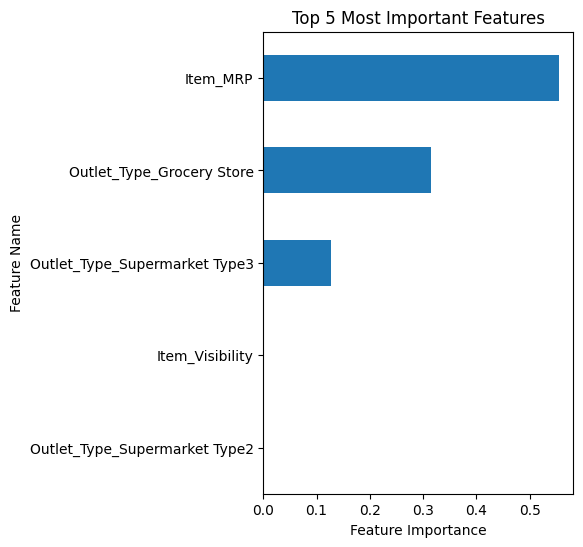

In [98]:
ax = feature_importance.sort_values().tail(5).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 5 Most Important Features');

In [89]:
# Instantiate a default model with random state for reproducibility
model_lin_reg = LinearRegression()
# Fit the default model on the training data
model_lin_reg.fit(X_train_tf, y_train)
# Use custom function to predict and evaluate
evaluate_regression(model_lin_reg, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 847.387
- MSE = 1,300,512.646
- RMSE = 1,140.400
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 805.296
- MSE = 1,197,542.102
- RMSE = 1,094.323
- R^2 = 0.566


In [99]:
# view parameters that could be tuned
model.get_params()



{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [100]:
# define dictionary of parameters to tune and the values to try
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4]}



In [101]:
# instantiate GridSearchCV
grid_search = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 1)



In [102]:
# fit the Gridsearch on the training data
grid_search.fit(X_train_tf, y_train)


Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [103]:
# Obtain the best combination directly
grid_search.best_params_


{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [104]:
coeffs = pd.Series(lin_reg.coef_, index=feature_names,
                        name='Coefficients')
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs.head()

Item_Visibility               6.315615
Item_MRP                    928.053742
Outlet_Size                 -37.665642
Item_Fat_Content_Low Fat      9.349812
Item_Fat_Content_Regular     -9.349812
Name: Coefficients, dtype: float64

In [105]:
## rank the coeffs and select the top_n
top_n=15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n)
coeffs_plot = coeffs.loc[top_n_features.index].sort_values()
coeffs_plot

Outlet_Type_Grocery Store       -1720.739684
Item_Type_Household              -139.200540
Outlet_Type_Supermarket Type2    -131.564479
Item_Type_Breakfast               -90.118250
Item_Type_Health and Hygiene      -88.983177
Item_Type_Seafood                 -65.815259
Item_Type_Frozen Foods            -62.859593
Item_Type_Starchy Foods           -47.835198
Item_Type_Meat                     53.380433
Item_Type_Breads                  101.193733
Item_Type_Dairy                   170.619586
Outlet_Type_Supermarket Type1     199.603589
Item_MRP                          928.053742
Outlet_Type_Supermarket Type3    1652.700574
intercept                        2033.631018
Name: Coefficients, dtype: float64

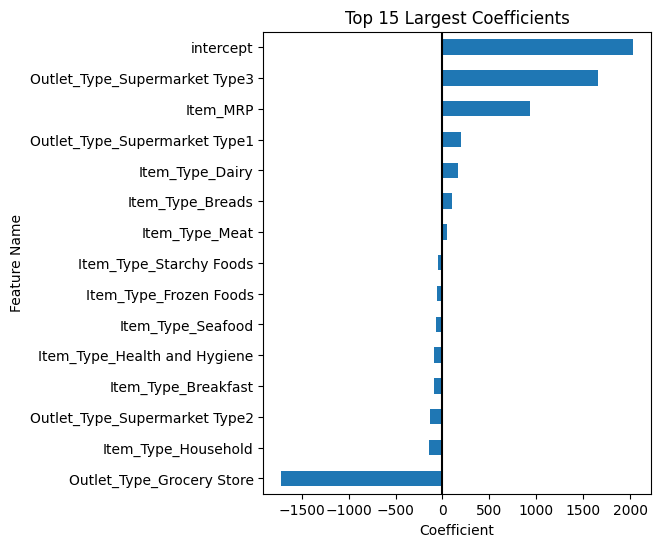

In [108]:
# sort features and keep top_n and set title
ax = coeffs_plot.sort_values().plot(kind='barh',figsize=(5,6))
ax.axvline(0,color='k');
ax.set(title = f"Top {top_n} Largest Coefficients",ylabel="Feature Name",
      xlabel='Coefficient');


### **3 Most Impactful Coefficients**

1. Outlet_Type_Supermarket Type 3

We can expect an increase of ~$1652 in product sales according to this coefficient all other factors being equal.

2. Item MRP

We can expect an increase of ~$928 in product sales according to this coefficient all other factors being equal.

3. Outlet_Type_Supermarket Type1

We can expect an increase of ~$199 in product sales according to this coefficient all other factors being equal.